# HR ATTRIBUTION

In [25]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree  
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

# 1.) Import, split data into X/y, plot y data as bar charts, turn X categorical variables binary and tts.

In [26]:
df = pd.read_csv("HR_Analytics.csv")

In [27]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [28]:
y = df[["Attrition"]].copy()
X = df.drop("Attrition", axis = 1)

In [29]:
#m 
y["Attrition"] = [1 if i == "Yes" else 0 for i in y["Attrition"]]

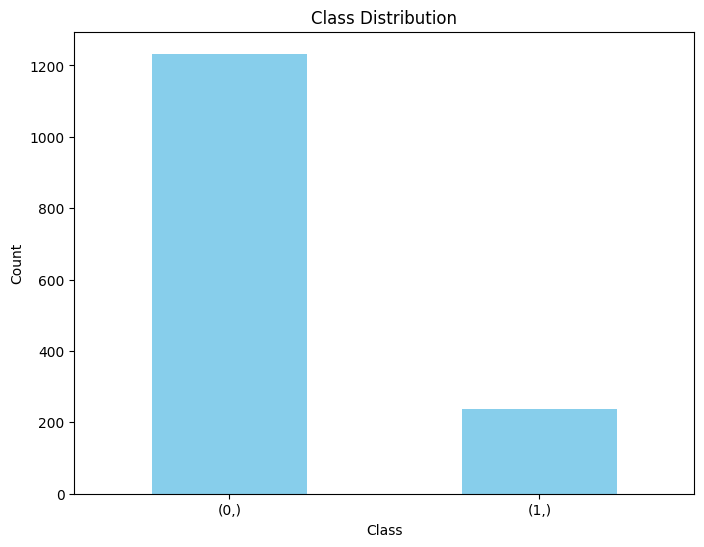

In [30]:
class_counts = y.value_counts()


plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=0)  # Remove rotation of x-axis labels
plt.show()



In [31]:
# Step 1: Identify string columns
string_columns = X.columns[X.dtypes == 'object']

# Step 2: Convert string columns to categorical
for col in string_columns:
    X[col] = pd.Categorical(X[col])

# Step 3: Create dummy columns
X = pd.get_dummies(X, columns=string_columns, prefix=string_columns,drop_first=True)




In [32]:
x_train,x_test,y_train,y_test=train_test_split(X,
 y, test_size=0.20, random_state=42)


# 2.) Using the default Decision Tree. What is the IN/Out of Sample accuracy?

In [33]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_train)
acc=accuracy_score(y_train,y_pred)
print("IN SAMPLE ACCURACY : " , round(acc,2))

y_pred=clf.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print("OUT OF SAMPLE ACCURACY : " , round(acc,2))

IN SAMPLE ACCURACY :  1.0
OUT OF SAMPLE ACCURACY :  0.76


# 3.) Run a grid search cross validation using F1 score to find the best metrics. What is the In and Out of Sample now?

In [34]:

# Define the hyperparameter grid to search through
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(1, 11),  # Range of max_depth values to try
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


dt_classifier = DecisionTreeClassifier(random_state=42)

scoring = make_scorer(f1_score, average='weighted')

grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, scoring=scoring, cv=5)

grid_search.fit(x_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best F1-Score:", best_score)


Best Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best F1-Score: 0.8214764475510983


In [35]:
clf = tree.DecisionTreeClassifier(**best_params, random_state =42)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_train)
acc=accuracy_score(y_train,y_pred)
print("IN SAMPLE ACCURACY : " , round(acc,2))

y_pred=clf.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print("OUT OF SAMPLE ACCURACY : " , round(acc,2))

IN SAMPLE ACCURACY :  0.91
OUT OF SAMPLE ACCURACY :  0.83


# 4.) Plot ......

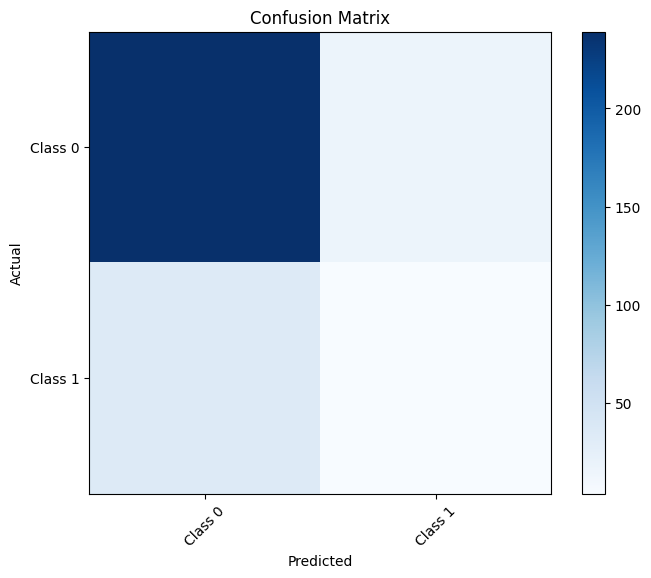

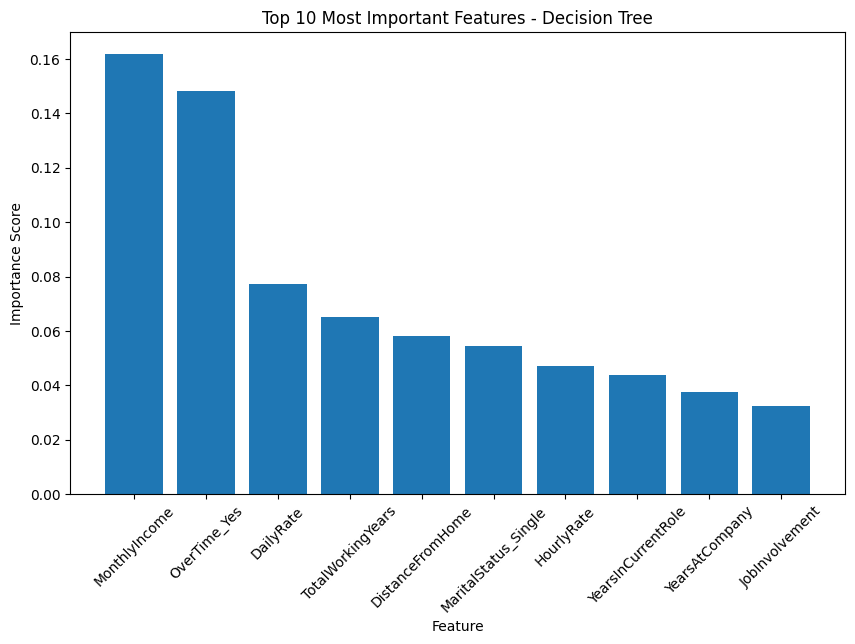

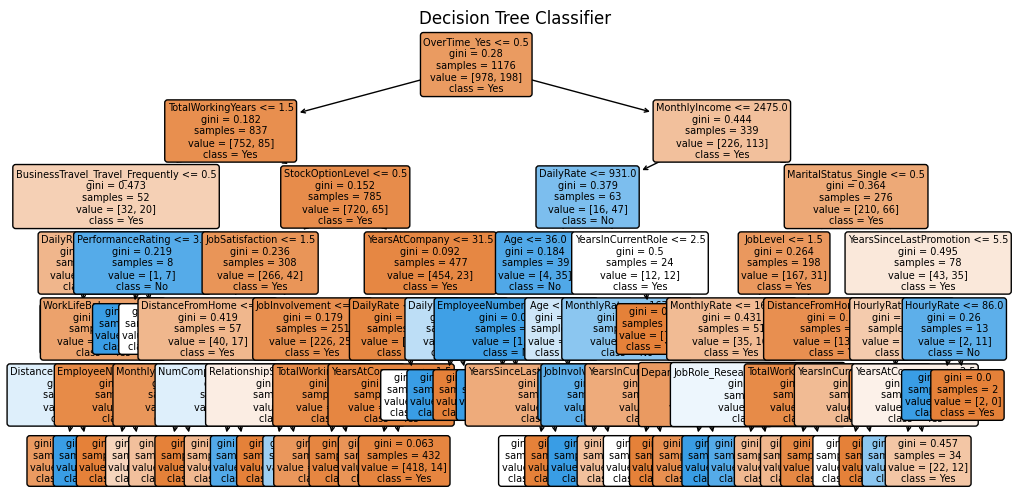

In [36]:
# Make predictions on the test data
y_pred = clf.predict(x_test)
y_prob = clf.predict_proba(x_test)[:, 1]

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(conf_matrix))
plt.xticks(tick_marks, ['Class 0', 'Class 1'], rotation=45)
plt.yticks(tick_marks, ['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




feature_importance = clf.feature_importances_

# Sort features by importance and select the top 10
top_n = 10
top_feature_indices = np.argsort(feature_importance)[::-1][:top_n]
top_feature_names = X.columns[top_feature_indices]
top_feature_importance = feature_importance[top_feature_indices]

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
plt.bar(top_feature_names, top_feature_importance)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Top 10 Most Important Features - Decision Tree')
plt.xticks(rotation=45)
plt.show()

# Plot the Decision Tree for better visualization of the selected features
plt.figure(figsize=(12, 6))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["Yes", "No"], rounded=True, fontsize=7)
plt.title('Decision Tree Classifier')
plt.show()



# 5.) Looking at the graphs. what would be your suggestions to try to improve customer retention? What additional information would you need for a better plan. Plot anything you think would assist in your assessment.

In [37]:
from scipy.stats import pearsonr

In [38]:
def calculate_correlation(X, feature_name, y):
        feature= X[feature_name]
        coef, _= pearsonr(feature,y)
        return coef

In [39]:
np.corrcoef(np.array(X["OverTime_Yes"]), np.array(y["Attrition"]))

array([[1.        , 0.24611799],
       [0.24611799, 1.        ]])

The correlation coefficient is approximately 0.246 between 'OverTime_Yes' and 'Attrition'

The following are my suggestions;

1)Review Overtime Policies: Given the moderate positive correlation, review and potentially revise overtime policies to reduce unnecessary overtime.

2)Work-Life Balance Initiatives: Implement or enhance work-life balance programs to offset the impact of any required overtime.

3)Monitor and Manage Workloads: Regularly assess employee workloads to prevent burnout and reduce the need for overtime.




# 6.) Using the Training Data, if they made everyone work overtime.And made No one work overtime. What would have been the expected difference in client retention?

In [40]:
x_train_experiment = x_train.copy()

In [41]:
x_train_experiment["OverTime_Yes"] = 0.

In [42]:
y_pred = clf.predict(x_train)
y_pred_experiment = clf.predict(x_train_experiment)

In [46]:
diff = sum(y_pred - y_pred_experiment)

print ("Change fro, .....", diff)

Change fro, ..... 59


This suggests that making no one work overtime (as opposed to the current situation) would change the retention predictions by 59 units. This implies a significant impact of overtime on employee retention and suggests that reducing or managing overtime effectively could lead to better retention.



# 7.) If they company loses an employee, there is a cost to train a new employee for a role ~2.8 * their monthly income.
# To make someone not work overtime costs the company 2K per person.
# Is it profitable for the company to remove overtime? If so/not by how much? 
# What do you suggest to maximize company profits?

In [47]:
x_train_experiment["Y"] = y_pred
x_train_experiment["Y_exp"] = y_pred_experiment

In [50]:
x_train_experiment["RetChange"] = x_train_experiment ["Y_exp"] - x_train_experiment["Y"]

In [51]:
sav = sum(-2.8*x_train_experiment["RetChange"]*x_train_experiment["MonthlyIncome"])

In [52]:
cost = len(x_train[x_train ["OverTime_Yes"] ==1])*2000

In [53]:
sav-cost

-117593.99999999977

This suggests that removing overtime would lead to a net loss of approximately 117,594 dollars for the company. This indicates that the cost of removing overtime (paying 2000 dollars per employee) outweighs the savings from reduced attrition costs.

Given, completely removing overtime might not be the most profitable option due to its high cost.consider the following strategies to maximize profits;



1) Optimize Overtime Usage: Rather than eliminating overtime entirely, optimize its usage. Identify critical periods where overtime is essential and limit it to those times.

2) Employee Well-being Programs: Invest in employee well-being to reduce turnover due to burnout and overwork, which can be less costly than eliminating overtime.

3) Targeted Overtime Reduction: Focus on reducing overtime in departments or roles with the highest attrition rates, where the cost-benefit balance might be more favorable.



# 8.) Use your model and get the expected change in retention for raising and lowering peoples income. Plot the outcome of the experiment. Comment on the outcome of the experiment and your suggestions to maximize profit.

In [54]:
raise_amount= 100

In [57]:
profits = []
for raise_amount in range(-1000, 1000,100):
    x_train_experiment= x_train.copy()
    x_train_experiment ["MonthlyIncome"] = x_train_experiment ["MonthlyIncome"]+ raise_amount 

    y_pred = clf.predict(x_train)
    y_pred_experiment = clf.predict(x_train_experiment)

    diff = sum(y_pred - y_pred_experiment)
    print ("Change in attrition", diff)
    x_train_experiment ["Y"] = y_pred
    x_train_experiment ["Y_exp"] = y_pred_experiment

    x_train_experiment["RetChange"] = x_train_experiment ["Y_exp"] - x_train_experiment["Y"]
    sav = sum(-2.8*x_train_experiment["RetChange"]*x_train_experiment["MonthlyIncome"])
    cost = len(x_train)*raise_amount
    print("profits,", sav-cost)
    profits.append(sav-cost)


Change in attrition -16
profits, 1087584.4
Change in attrition -14
profits, 979524.0
Change in attrition -13
profits, 864992.8
Change in attrition -12
profits, 750738.8
Change in attrition -12
profits, 629778.8
Change in attrition -9
profits, 530138.0
Change in attrition -7
profits, 424200.0
Change in attrition -4
profits, 326096.4
Change in attrition -1
profits, 228440.8
Change in attrition -1
profits, 110714.8
Change in attrition 0
profits, 0.0
Change in attrition 6
profits, -75328.40000000001
Change in attrition 15
profits, -127503.60000000002
Change in attrition 15
profits, -240914.8
Change in attrition 21
profits, -311586.80000000005
Change in attrition 22
profits, -416449.6000000001
Change in attrition 22
profits, -527889.6000000001
Change in attrition 22
profits, -639329.6000000001
Change in attrition 22
profits, -750769.6000000001
Change in attrition 23
profits, -854999.6000000001


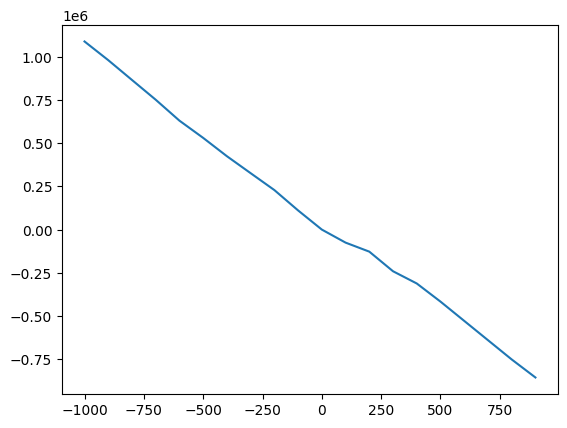

In [58]:
plt.plot(range(-1000, 1000, 100), profits)
plt.show()

Suggestions:
Optimal Raise Range: There is an optimal range for salary increases where profits are maximized. Beyond this range, the cost of salary increases outweighs the savings from reduced attrition.

Diminishing Returns: Significantly high raises lead to diminishing returns in terms of profits, as the increased cost is not sufficiently offset by reduced attrition.

Balancing Act: A balanced approach to salary adjustments is crucial. Both salary reductions and excessive increases can lead to decreased profits.

Recommendation to Maximize Profits:
Moderate Salary Increases: Implement moderate salary increases focused on roles with high turnover rates or those critical to the business.

Comprehensive Compensation Strategy: Consider non-monetary benefits and rewards to enhance employee satisfaction without significantly increasing costs.

Continuous Monitoring: Regularly review the impact of salary adjustments on employee retention and company profits to make data-driven decisions.





